# Showcase for ptdalgorithms

Python header:

In [1]:
%load_ext rpy2.ipython

from IPython.display import Image
from graphviz import Digraph
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style('ticks')
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina', 'png')

def plot_graph(states, ipv, sim, constrained=True, size='10'):

    constrained = constrained and 'true' or 'false'
    states = np.array(states)
    
    # add the missing row and col to SIM
    rates = np.r_[np.c_[sim, -sim.sum(axis=1)], np.zeros((1, len(sim)+1))]

    dot = Digraph()
    dot.node('S', 'S')
    for i in range(1, len(states)):
        dot.node(str(i), str(states[i]))
    for i in range(len(ipv)):
        if ipv[i]:
            dot.edge('S', str(i+1), constraint=constrained, label=str(ipv[i]))
    for i in range(1, len(states)):
        for j in range(1, len(states)):
            if i != j and rates[i-1, j-1] > 0:
                dot.edge(str(i), str(j), constraint=constrained, label=str(rates[i-1, j-1]))
    dot.graph_attr['size'] = size                
    return dot

R header:

In [7]:
%%R
library(tidyverse)

library(devtools)
remove.packages("ptdalgorithms")

devtools::install_github("TobiasRoikjer/PtDAlgorithms")

library(ptdalgorithms)

R[write to console]: Removing package from ‘/Users/kmt/miniconda3/envs/phasetypes/lib/R/library’
(as ‘lib’ is unspecified)

R[write to console]: Updating HTML index of packages in '.Library'

R[write to console]: Making 'packages.html' ...
R[write to console]:  done

R[write to console]: Downloading GitHub repo TobiasRoikjer/PtDAlgorithms@HEAD



* checking for file ‘/private/var/folders/33/sv_s_4ps2gjgpwdxjvz9jly00000gn/T/RtmpmKKfNf/remotes123b76f7b0b3/TobiasRoikjer-PtDAlgorithms-d022b12/DESCRIPTION’ ... OK
* preparing ‘ptdalgorithms’:
* checking DESCRIPTION meta-information ... OK
* cleaning src
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘ptdalgorithms_1.0.0.tar.gz’



* installing *source* package ‘ptdalgorithms’ ...
** using staged installation
** libs


x86_64-apple-darwin13.4.0-clang++ -std=gnu++14 -I"/Users/kmt/miniconda3/envs/phasetypes/lib/R/include" -DNDEBUG  -I'/Users/kmt/miniconda3/envs/phasetypes/lib/R/library/Rcpp/include' -D_FORTIFY_SOURCE=2 -isystem /Users/kmt/miniconda3/envs/phasetypes/include -mmacosx-version-min=10.9 -I/Users/kmt/miniconda3/envs/phasetypes/include  -I../api/cpp -I../api/c -Ic/ -Icpp/ -fPIC  -march=core2 -mtune=haswell -mssse3 -ftree-vectorize -fPIC -fPIE -fstack-protector-strong -O2 -pipe -stdlib=libc++ -fvisibility-inlines-hidden  -fmessage-length=0 -isystem /Users/kmt/miniconda3/envs/phasetypes/include -fdebug-prefix-map=/Users/runner/miniforge3/conda-bld/r-base-split_1639563465184/work=/usr/local/src/conda/r-base-4.1.2 -fdebug-prefix-map=/Users/kmt/miniconda3/envs/phasetypes=/usr/local/src/conda-prefix  -c RcppExports.cpp -o RcppExports.o
x86_64-apple-darwin13.4.0-clang++ -std=gnu++14 -I"/Users/kmt/miniconda3/envs/phasetypes/lib/R/include" -DNDEBUG  -I'/Users/kmt/miniconda3/envs/phasetypes/lib/R/libra

ld: warning: -pie being ignored. It is only used when linking a main executable
installing to /Users/kmt/miniconda3/envs/phasetypes/lib/R/library/00LOCK-ptdalgorithms/00new/ptdalgorithms/libs
** R
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (ptdalgorithms)


## Standard coalescent

If you already have the subintensity matrix and initial probability vector:

In [8]:
%%R -o sim -o ipv
sim = matrix(c(-6, 6, 0, 0, 
               0, -3, 1, 2,
               0, 0, -1, 0,
               0, 0, 0, -1), nrow=4, ncol=4, byrow = TRUE)
ipv = c(1, 0, 0, 0)
sim

     [,1] [,2] [,3] [,4]
[1,]   -6    6    0    0
[2,]    0   -3    1    2
[3,]    0    0   -1    0
[4,]    0    0    0   -1


In [9]:
%%R 
graph <- matrix_as_graph(ipv, sim)

Note that the state vectors are ofcause undefined (all zero) when constructing the graph this way:

In [10]:
%%R
graph_as_matrix(graph)

$states
     [,1]
[1,]    0
[2,]    0
[3,]    0
[4,]    0

$SIM
     [,1] [,2] [,3] [,4]
[1,]   -6    6    0    0
[2,]    0   -3    1    2
[3,]    0    0   -1    0
[4,]    0    0    0   -1

$IPV
[1] 1 0 0 0



In [11]:
%%R
dph(0.9, graph)

[1] 0.5362689


If you want to generate the state space:

In [12]:
%%R -o states -o ipv -o sim -o n -o graph
n <- 6
  
state_vector_length <- n
graph <- create_graph(state_vector_length)
starting_vertex <- vertex_at(graph, 1)
initial_state <- rep(0, n)
initial_state[1] <- n

add_edge(
  starting_vertex,
  create_vertex(graph, initial_state),
  1
)
index <- 2

while (index <= vertices_length(graph)) {
  vertex <- vertex_at(graph, index)
  
  # loop over all classes of lineages
  for (i in 1:n) {
    for (j in i:n) {
      state <- vertex$state
      
      # if same class, there need to be at least two to coalesce
      if (i == j) {
        if (state[i] < 2) {
          next;
        }
        # coal rate
        rate <- state[i] * (state[i] - 1) / 2
      } else {
        # else at least one in each class to coalesce
        if (state[i] < 1 || state[j] < 1) {
          next;
        }
        # number of combinations
        rate <- state[i] * state[j]
      }
      
      # copy state
      child_state <- state
      # update child state
      child_state[i] <- child_state[i] - 1
      child_state[j] <- child_state[j] - 1
      child_state[i+j] <- child_state[i+j] + 1
      
      add_edge(
          vertex,
          find_or_create_vertex(graph, child_state),
          rate, c(rate)
        )
    }
  }
      
  index <- index + 1
}

states <- t(sapply(1:vertices_length(graph), function(index) vertex_at(graph, index)$state ))
ipv <- graph_as_matrix(graph)$IPV
sim <- graph_as_matrix(graph)$SIM

vertices_length(graph)

[1] 12


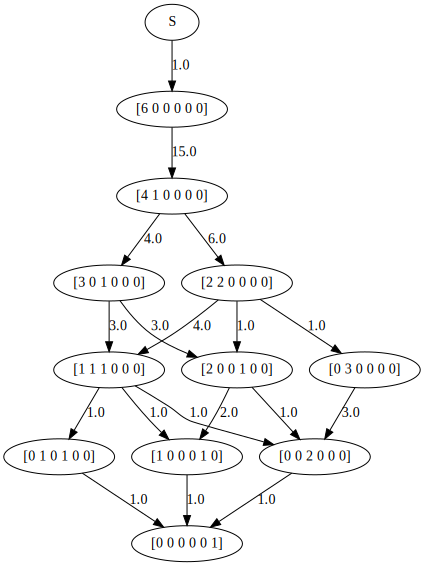

In [13]:
plot_graph(states, ipv, sim)

As matrices:

In [14]:
%%R -o states -o sim
matrices <- graph_as_matrix(graph)
states <- matrices$states
sim <- matrices$SIM
matrices

$states
      [,1] [,2] [,3] [,4] [,5] [,6]
 [1,]    6    0    0    0    0    0
 [2,]    4    1    0    0    0    0
 [3,]    2    2    0    0    0    0
 [4,]    3    0    1    0    0    0
 [5,]    0    3    0    0    0    0
 [6,]    1    1    1    0    0    0
 [7,]    2    0    0    1    0    0
 [8,]    0    0    2    0    0    0
 [9,]    0    1    0    1    0    0
[10,]    1    0    0    0    1    0

$SIM
      [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10]
 [1,]  -15   15    0    0    0    0    0    0    0     0
 [2,]    0  -10    6    4    0    0    0    0    0     0
 [3,]    0    0   -6    0    1    4    1    0    0     0
 [4,]    0    0    0   -6    0    3    3    0    0     0
 [5,]    0    0    0    0   -3    0    0    0    3     0
 [6,]    0    0    0    0    0   -3    0    1    1     1
 [7,]    0    0    0    0    0    0   -3    0    1     2
 [8,]    0    0    0    0    0    0    0   -1    0     0
 [9,]    0    0    0    0    0    0    0    0   -1     0
[10,]    0    0    0

Invert subintensity matrix to get Green matrix:

In [15]:
%%R
U <- -solve(matrices$SIM)
U

            [,1] [,2]      [,3]       [,4]       [,5]      [,6]       [,7]
 [1,] 0.06666667  0.1 0.1000000 0.06666667 0.03333333 0.2000000 0.10000000
 [2,] 0.00000000  0.1 0.1000000 0.06666667 0.03333333 0.2000000 0.10000000
 [3,] 0.00000000  0.0 0.1666667 0.00000000 0.05555556 0.2222222 0.05555556
 [4,] 0.00000000  0.0 0.0000000 0.16666667 0.00000000 0.1666667 0.16666667
 [5,] 0.00000000  0.0 0.0000000 0.00000000 0.33333333 0.0000000 0.00000000
 [6,] 0.00000000  0.0 0.0000000 0.00000000 0.00000000 0.3333333 0.00000000
 [7,] 0.00000000  0.0 0.0000000 0.00000000 0.00000000 0.0000000 0.33333333
 [8,] 0.00000000  0.0 0.0000000 0.00000000 0.00000000 0.0000000 0.00000000
 [9,] 0.00000000  0.0 0.0000000 0.00000000 0.00000000 0.0000000 0.00000000
[10,] 0.00000000  0.0 0.0000000 0.00000000 0.00000000 0.0000000 0.00000000
           [,8]      [,9]     [,10]
 [1,] 0.2000000 0.4000000 0.4000000
 [2,] 0.2000000 0.4000000 0.4000000
 [3,] 0.2222222 0.4444444 0.3333333
 [4,] 0.1666667 0.3333333 0.500

Compute expectation from matrices:

In [16]:
%%R
matrices$IPV %*% U %*% rep(1, length(matrices$IPV))

         [,1]
[1,] 1.666667


Compute moments:

In [17]:
%%R
expectation(graph)

[1] 1.666667


INFO: building reward compute graph...


In [18]:
%%R
expected_waiting_time(graph)

 [1] 1.666667 1.666667 1.600000 1.500000 1.500000 1.333333 1.333333 1.333333
 [9] 1.000000 1.000000 1.000000 0.000000


In [19]:
%%R
variance(graph)

[1] 1.153333


In [20]:
%%R
2 * expected_waiting_time(graph, expected_waiting_time(graph)) - expected_waiting_time(graph) * expected_waiting_time(graph)

 [1] 1.153333 1.153333 1.148889 1.138889 1.138889 1.111111 1.111111 1.111111
 [9] 1.000000 1.000000 1.000000 0.000000


In [21]:
%%R
moments(graph, 4)

[1]  1.666667  3.931111 12.482222 50.914400


Marginal expectations using rewards:

In [22]:
%%R
state_matrix <- sapply(1:vertices_length(graph), function(index) vertex_at(graph, index)$state )
state_matrix

     [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12]
[1,]    0    6    4    2    3    0    1    2    0     0     1     0
[2,]    0    0    1    2    0    3    1    0    1     0     0     0
[3,]    0    0    0    0    1    0    1    0    0     2     0     0
[4,]    0    0    0    0    0    0    0    1    1     0     0     0
[5,]    0    0    0    0    0    0    0    0    0     0     1     0
[6,]    0    0    0    0    0    0    0    0    0     0     0     1


Rows happens to be our reward vectors. E.g. singleton rewards:

In [23]:
%%R
rewards <- sapply(1:vertices_length(graph), function(index) vertex_at(graph, index)$state )
singletons <- rewards[1,]
doubletons <- rewards[2,]
tripletons <- rewards[3,]
singletons

 [1] 0 6 4 2 3 0 1 2 0 0 1 0


Expected tripleton branch length:

In [24]:
%%R
expectation(graph, tripletons)

[1] 0.6666667


SFS:

In [25]:
%%R -o sfs
sfs <- sapply(1:(dim(rewards)[1]-1), function(i) expectation(graph, rewards[i,]))
sfs

[1] 2.0000000 1.0000000 0.6666667 0.5000000 0.4000000


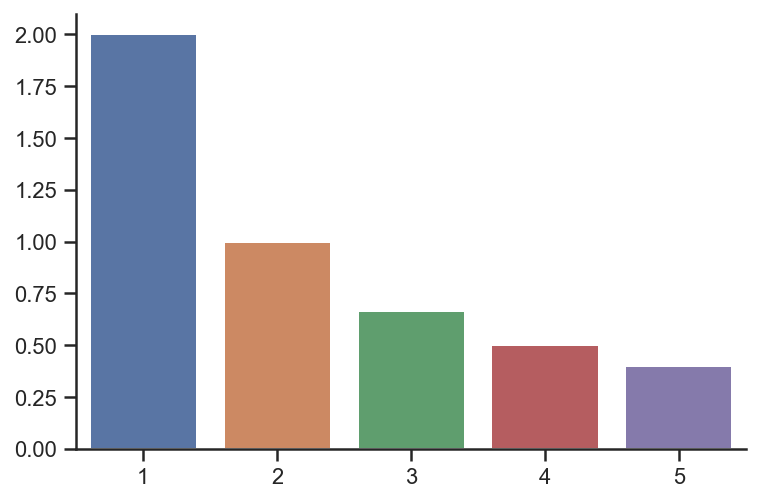

In [26]:
sns.barplot(x=list(range(1, len(sfs)+1)), y=sfs)
sns.despine()

Covariance:

In [27]:
%%R
covariance(graph, singletons, doubletons)

[1] -0.1733333


In [28]:
%%R
covariance(graph, singletons, tripletons)

[1] -0.1


Covariane between "ton" branch length:

In [29]:
%%R -o cov_mat
cov_mat <- matrix(nrow=n-1,ncol=n-1)

for (i in 1:(n-1)) {
    for (j in 1:(n-1)) {
        cov_mat[i, j] <- covariance(graph, rewards[i,], rewards[j,])
    }
}

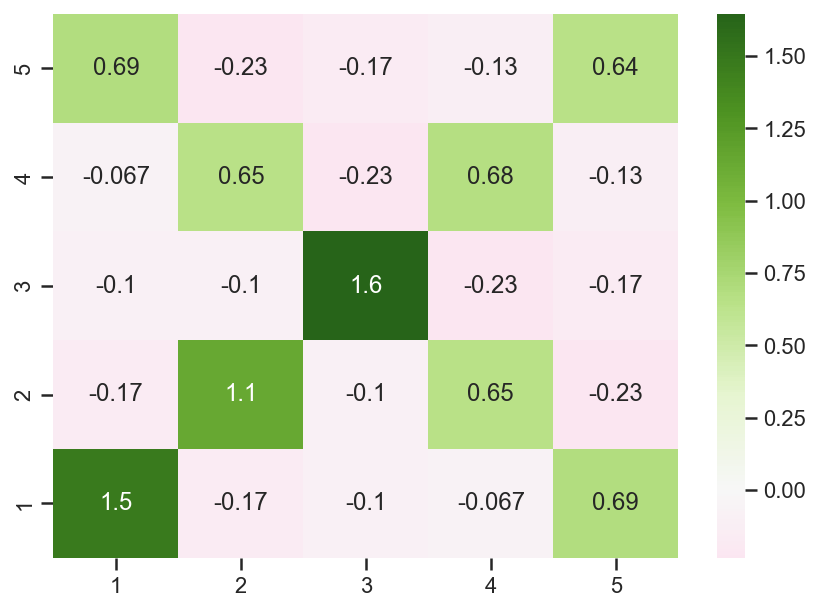

In [30]:
plt.subplots(1, 1, figsize=(7, 5))
ticks = list(range(1,int(n)))
ax = sns.heatmap(cov_mat, cmap="PiYG", 
                annot=True,
                center=0,
                yticklabels=ticks,
                xticklabels=ticks
                )
ax.invert_yaxis()

Distributions of each "ton" branch length:

In [31]:
%%R -o result

result = data.frame()
for (i in 1:(dim(rewards)[1]-1)) {
    x <- seq(from = 0, to = 5, by = 0.01)
    pdf <- dph(x, reward_transform(graph, rewards[i, ]))
    df <- data.frame(prob = pdf, t=x, ton=i)
    result <- rbind(result, df)
}
#result %>% ggplot(aes(y=prob, x=t, color=ton, group=ton)) + geom_line(size=1)

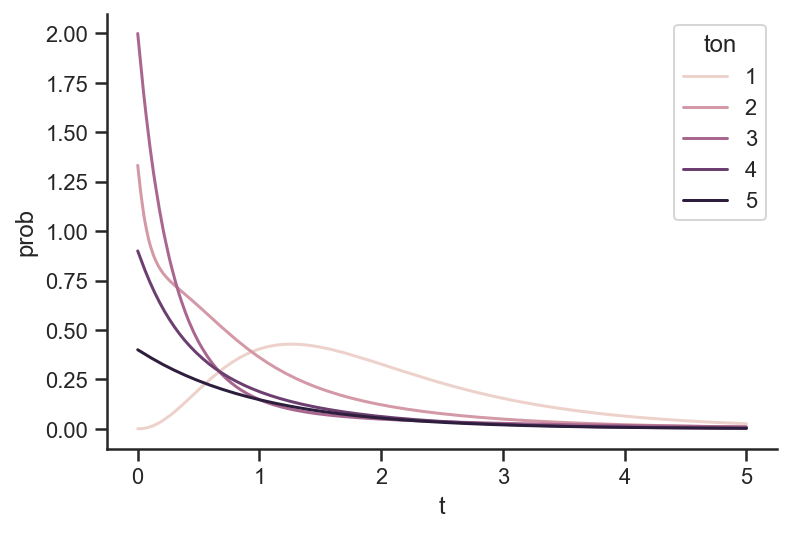

In [32]:
sns.lineplot(data=result, y='prob', x='t', hue='ton')
sns.despine()

Compute expectations from the distributions:

In [33]:
%%R -o sfs
ctx <- distribution_context(graph,1000)
prev_size <- 0
while (distribution_context_state(ctx)$cdf < 0.999) { 
    distribution_context_step(ctx)
}
expected_visits <- distribution_context_accumulated_visiting_time(ctx)
sfs <- sapply(1:(dim(rewards)[1]-1), function(i) sum(expected_visits * rewards[i,]))
sfs

[1] 1.9996008 0.9996008 0.6662674 0.4996008 0.3996008


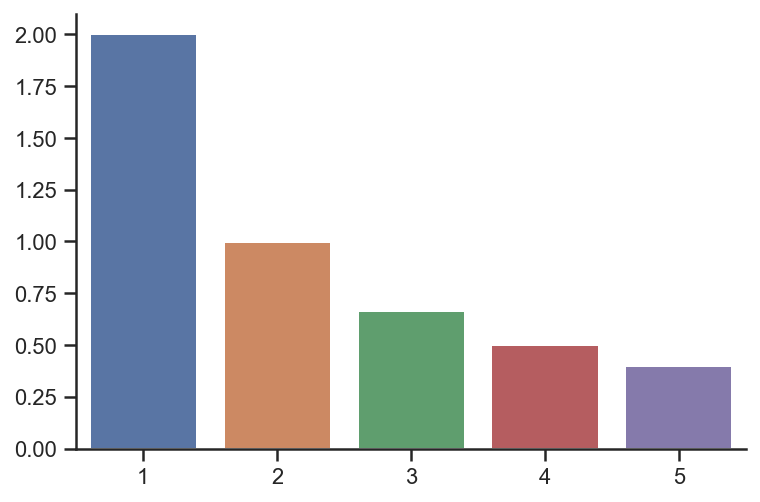

In [34]:
sns.barplot(x=list(range(1, len(sfs)+1)), y=sfs)
sns.despine()

Changing rates (edge weights) using parametrization:

In [35]:
%%R -o states -o ipv -o sim

graph_update_weights_parameterized(graph, c(2))

states <- t(sapply(1:vertices_length(graph), function(index) vertex_at(graph, index)$state ))
ipv <- graph_as_matrix(graph)$IPV
sim <- graph_as_matrix(graph)$SIM

Change rates back to normal:

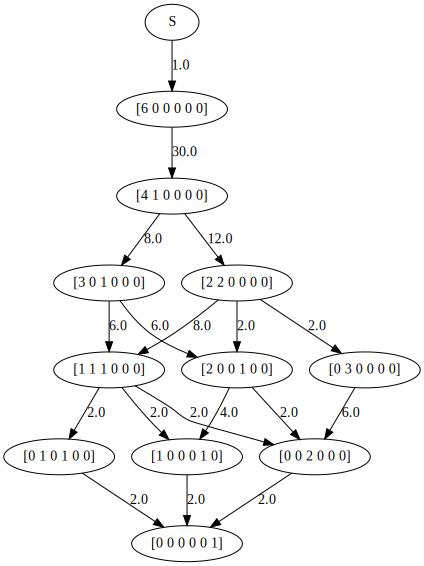

In [36]:
plot_graph(states, ipv, sim)

In [37]:
%%R -o states -o ipv -o sim

graph_update_weights_parameterized(graph, c(1))

states <- t(sapply(1:vertices_length(graph), function(index) vertex_at(graph, index)$state ))
ipv <- graph_as_matrix(graph)$IPV
sim <- graph_as_matrix(graph)$SIM

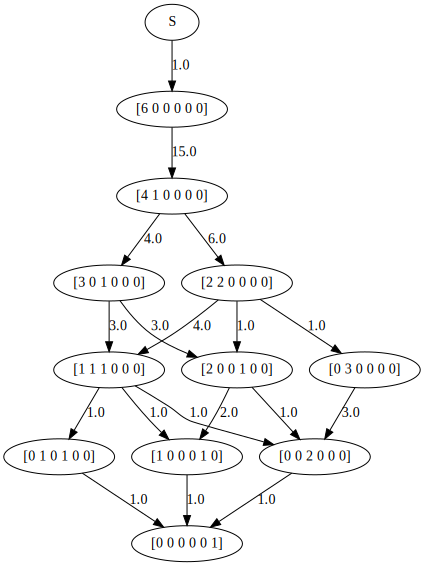

In [38]:
plot_graph(states, ipv, sim)

## Time-inhomgeneous coalescent

The distribution context is always made on the graph without rewards transformation. You can then:

- Get the distribution (and from that all moments) of time to absorbtion. Note that you cannot use dph for this as this assumes the current edge-weights and not seqentially updated ones in the distribution context.
- Get the marginal exepectations by summing over the products of the expected accumulated visiting times and rewards.


In [39]:
%%R -o cdf1 -o cdf2 -o cdf3

cdf_timeinhom <- function(graph, eqopues, sizes) {

    tmrca_pdf <- c()
    time <- c()
    
    ctx <- distribution_context(graph, 1000)
    prev_size <- 0
    while (distribution_context_state(ctx)$cdf < 0.999) { 
        tmrca_pdf[[(length(tmrca_pdf) + 1)]] <- distribution_context_state(ctx)$cdf
        time[[(length(time) + 1)]] <- distribution_context_state(ctx)$time
        
        size <- sizes[findInterval(distribution_context_state(ctx)$time, epoques)]
        if (size != prev_size) {
            graph_update_weights_parameterized(graph, c(1/size))
        }
        prev_size <- size
        distribution_context_step(ctx)
    }

    return(data.frame(prob = unlist(tmrca_pdf), t=unlist(time)))

}

epoques = c(0, 1, 2, 3, 4)
cdf1 <- cdf_timeinhom(graph, epoques, c(1, 1, 1, 1, 1))
cdf2 <- cdf_timeinhom(graph, epoques, c(1, 2, 4, 8, 16))
cdf3 <- cdf_timeinhom(graph, epoques, c(16, 8, 4, 2, 1))

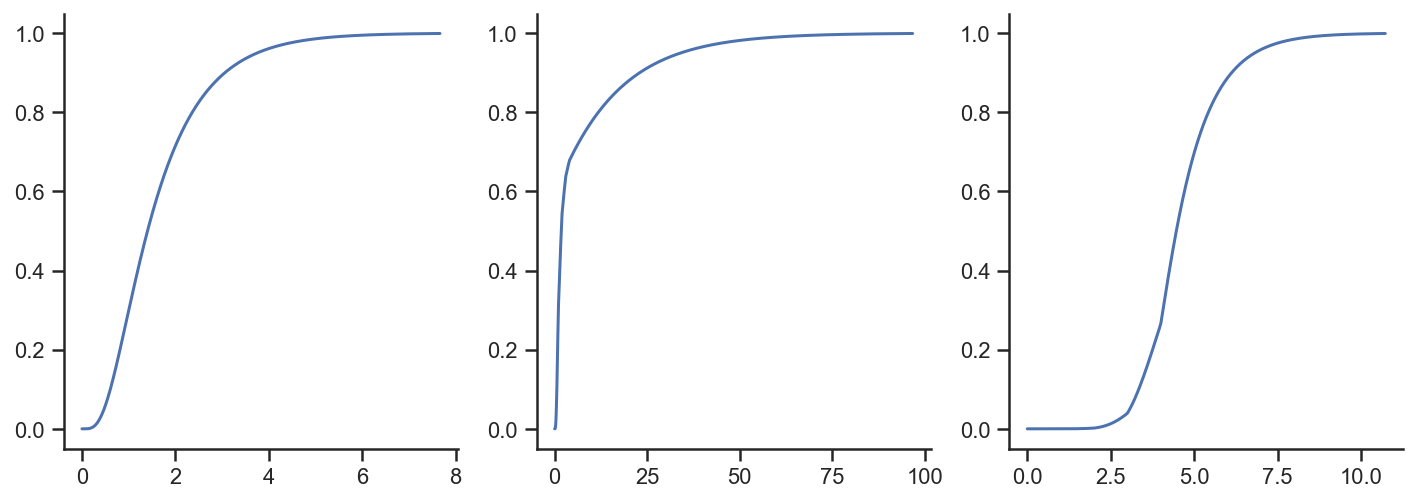

In [40]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].plot(cdf1.t, cdf1.prob)
axes[1].plot(cdf2.t, cdf2.prob)
axes[2].plot(cdf3.t, cdf3.prob)
sns.despine()

In [41]:
%%R -o sfs1 -o sfs2 -o sfs3

sfs_timeinhom <- function(graph, eqopues, sizes) {

    tmrca_pdf <- c()
    time <- c()
    
    ctx <- distribution_context(graph, 1000)
    prev_size <- 0
    while (distribution_context_state(ctx)$cdf < 0.999) { 
        # tmrca_pdf <- c(tmrca_pdf, distribution_context_state(ctx)$pdf)
        # time <- c(time, distribution_context_state(ctx)$time)
        tmrca_pdf[[(length(tmrca_pdf) + 1)]] <- distribution_context_state(ctx)$pdf
        time[[(length(time) + 1)]] <- distribution_context_state(ctx)$time
        
        size <- sizes[findInterval(distribution_context_state(ctx)$time, epoques)]
        if (size != prev_size) {
            graph_update_weights_parameterized(graph, c(1/size))
        }
        prev_size <- size
        distribution_context_step(ctx)
    }
    expected_visits <- distribution_context_accumulated_visiting_time(ctx)
    
    sfs <- c()
    for (i in 1:(dim(rewards)[1]-1)) {
        sfs <- c(sfs, sum(expected_visits * rewards[i, ]))
    }
    return(sfs)
}

epoques = c(0, 1, 2, 3, 4)
sfs1 <- sfs_timeinhom(graph, epoques, c(1, 1, 1, 1, 1))
sfs2 <- sfs_timeinhom(graph, epoques, c(1, 2, 4, 8, 16))
sfs3 <- sfs_timeinhom(graph, epoques, c(16, 8, 4, 2, 1))

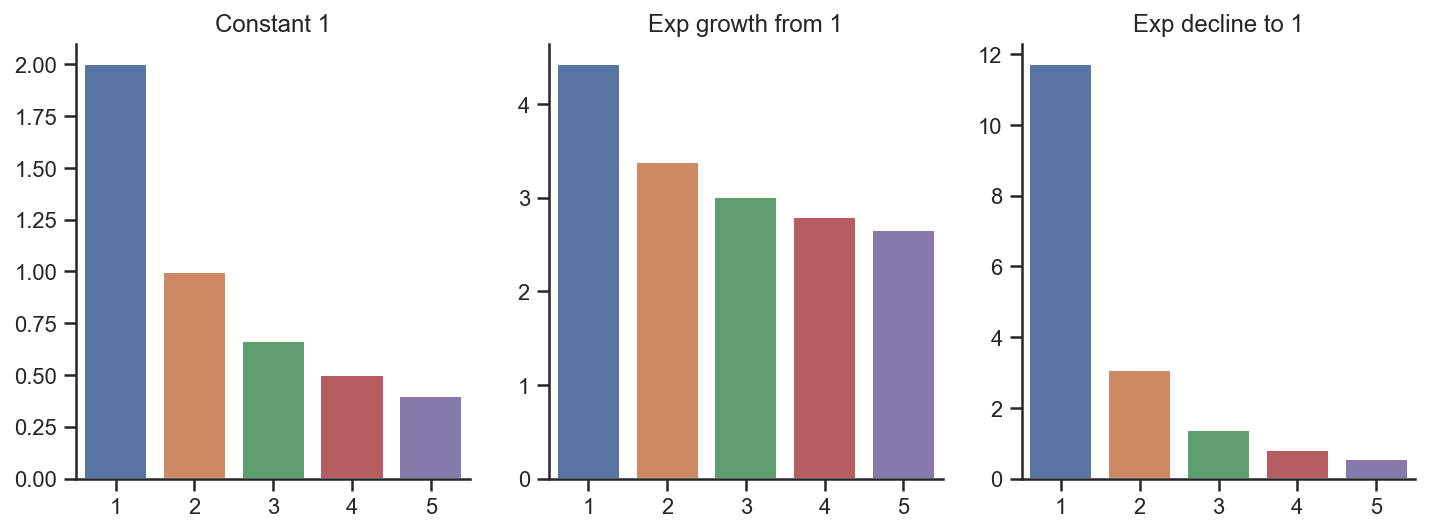

In [42]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
sns.barplot(x=list(range(1, len(sfs1)+1)), y=sfs1, ax=axes[0]).set_title("Constant 1")
sns.barplot(x=list(range(1, len(sfs2)+1)), y=sfs2, ax=axes[1]).set_title("Exp growth from 1")
sns.barplot(x=list(range(1, len(sfs3)+1)), y=sfs3, ax=axes[2]).set_title("Exp decline to 1")
sns.despine()

# Simple model in Keynote presentation

In [43]:
%%R -o states -o ipv -o sim

graph <- create_graph(1)

A <- create_vertex(graph, c(1))
B <- create_vertex(graph, c(2))
C <- create_vertex(graph, c(3))
D <- create_vertex(graph, c(4))

add_edge(starting_vertex(graph), A, 1)
add_edge(A, B, 0.12)
add_edge(A, D, 0.08)
add_edge(B, C, 0.25)
add_edge(B, D, 0.25)
add_edge(C, A, 0.2)

states <- t(sapply(1:vertices_length(graph), function(index) vertex_at(graph, index)$state, simplify = FALSE))
ipv <- graph_as_matrix(graph)$IPV
sim <- graph_as_matrix(graph)$SIM

vertices_length(graph)

[1] 5


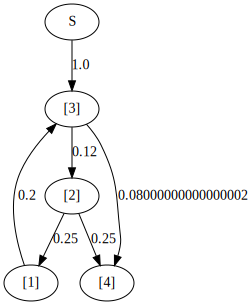

In [44]:
plot_graph(states, ipv, sim)

States:

In [45]:
%%R
expected_waiting_time(graph)

[1] 11 11 10 16  0


INFO: building reward compute graph...


Convert graph to matrix:

In [46]:
%%R
graph_as_matrix(graph)

$states
     [,1]
[1,]    3
[2,]    2
[3,]    1

$SIM
      [,1]  [,2] [,3]
[1,] -0.20  0.00  0.2
[2,]  0.25 -0.50  0.0
[3,]  0.00  0.12 -0.2

$IPV
[1] 0 0 1



Invert subintensity matrix to get Green matrix:

In [47]:
%%R -o U
U <- -solve(graph_as_matrix(graph)$SIM)
U

         [,1]     [,2]     [,3]
[1,] 7.142857 1.714286 7.142857
[2,] 3.571429 2.857143 3.571429
[3,] 2.142857 1.714286 7.142857


Sum first row of Green matrix to get expectation:

In [48]:
%%R
rowSums(U)

[1] 16 10 11


In [49]:
%%R
variance(graph)

[1] 139


In [50]:
%%R
r_prime <- expected_waiting_time(graph)
r_prime

[1] 11 11 10 16  0


In [51]:
%%R
2 * expected_waiting_time(graph, r_prime) - r_prime * r_prime

[1] 139 139 150 164   0


## Super simple model in Keynote presentation

Simplest possible model as example of how higher order moments are computed.

In [52]:
%%R -o states -o ipv -o sim

graph <- create_graph(1)

A <- create_vertex(graph, c(1))
B <- create_vertex(graph, c(2))
C <- create_vertex(graph, c(3))
D <- create_vertex(graph, c(4))

add_edge(starting_vertex(graph), A, 1)
add_edge(A, B, 1)
add_edge(B, C, 1)
add_edge(C, D, 1)

states <- t(sapply(1:vertices_length(graph), function(index) vertex_at(graph, index)$state, simplify = FALSE))
ipv <- graph_as_matrix(graph)$IPV
sim <- graph_as_matrix(graph)$SIM

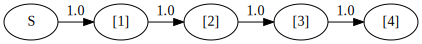

In [53]:
plot_graph(states, ipv, sim, constrained=False)

In [54]:
%%R
expected_waiting_time(graph)

[1] 3 3 2 1 0


INFO: building reward compute graph...


In [55]:
%%R
expected_waiting_time(graph, expected_waiting_time(graph))

[1] 6 6 3 1 0


In [56]:
%%R
moments(graph, 3)

[1]  3 12 60


In [57]:
%%R
2 * expected_waiting_time(graph, expected_waiting_time(graph)) - expected_waiting_time(graph) * expected_waiting_time(graph)

[1] 3 3 2 1 0


In [58]:
%%R
variance(graph)

[1] 3


# IM model

Each state has the following three properties:
1. nr decendants in population 1
2. nr decendants in population 2
3. what population the lineage is currently in

In [59]:
%%R
Rcpp::sourceCpp("./isolation_migration.cpp")

ld: warning: -pie being ignored. It is only used when linking a main executable


Comparing results for numerical accuracy for an "infinite" IM stage

In [60]:
%%R -o matrix_expectation -o algorithm_expectation -o simulation_expectation -o distribution_expectation 

n1 <- 4
n2 <- 4

g <- construct_im_graph(n1,n2,1,1,0.1,0.1)

expected_visits <- rep(0, vertices_length(g))
ctx <- distribution_context(g,1000)
while (distribution_context_state(ctx)$cdf < 0.9999) {
  distribution_context_step(ctx)
}
expected_visits <- distribution_context_accumulated_visiting_time(ctx)

distribution_expectation <- matrix(nrow=n1+1,ncol=n2+1)
algorithm_expectation <- matrix(nrow=n1+1,ncol=n2+1)
matrix_expectation <- matrix(nrow=n1+1,ncol=n2+1)
simulation_expectation <- matrix(nrow=n1+1,ncol=n2+1)
PH <- graph_as_matrix(g)
U <- solve(-PH$SIM)
set.seed(1234)

for (i in 0:n1) {
  for (j in 0:n2) {
    matrix_expectation[i+1,j+1] <-PH$IPV %*% U%*%diag(PH$states[,(matrix_index(i,j,0,n1,n2)+1)]+PH$states[,(matrix_index(i,j,1,n1,n2)+1)])%*%rep(1,length(PH$IPV))
    algorithm_expectation[i+1, j+1]<- expectation(g, rewards_at(g, i,j,n1,n2))
    distribution_expectation[i+1,j+1] <- sum(expected_visits * rewards_at(g, i,j,n1,n2))
    simulation_expectation[i+1, j+1]<- mean(rph(1000000, g, rewards_at(g, i,j,n1,n2)))
  }
}

print(sum(abs(matrix_expectation - algorithm_expectation)))
print(sum(abs(matrix_expectation - simulation_expectation)))
print(sum(abs(matrix_expectation - distribution_expectation)))

INFO: building reward compute graph...


[1] 7.160939e-15
[1] 0.04211939
[1] 0.001238273


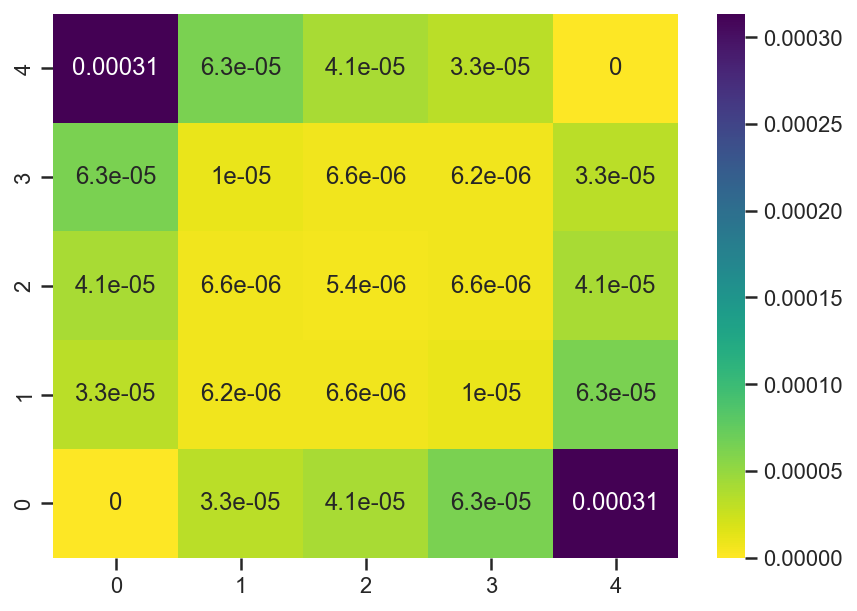

In [61]:
plt.subplots(1, 1, figsize=(7, 5))
ax = sns.heatmap(matrix_expectation - distribution_expectation, cmap="viridis_r", 
                annot=True
                )
ax.invert_yaxis()

The complete IM model with a split time and ancestral population:

In [62]:
%%time
%%R 

# parameters
n1 <- 7
n2 <- 7
m1 <- 1
m2 <- 1
split_t <- 1.5 # time in whatever unit used to scale transition probs (N generations)

# build im graph
im_g <- construct_im_graph(n1,n2,1,1,0.1,0.1)
cat(vertices_length(im_g), "\n")

# create ancestral graph
a_g <- construct_ancestral_graph(n1,n2)
cat(vertices_length(a_g), "\n")


123135 


R[write to console]: Fejl i construct_ancestral_graph(n1, n2) : 
  argument "pop_size" is missing, with no default




Fejl i construct_ancestral_graph(n1, n2) : 
  argument "pop_size" is missing, with no default


RInterpreterError: Failed to parse and evaluate line '\n# parameters\nn1 <- 7\nn2 <- 7\nm1 <- 1\nm2 <- 1\nsplit_t <- 1.5 # time in whatever unit used to scale transition probs (N generations)\n\n# build im graph\nim_g <- construct_im_graph(n1,n2,1,1,0.1,0.1)\ncat(vertices_length(im_g), "\\n")\n\n# create ancestral graph\na_g <- construct_ancestral_graph(n1,n2)\ncat(vertices_length(a_g), "\\n")\n'.
R error message: 'Fejl i construct_ancestral_graph(n1, n2) : \n  argument "pop_size" is missing, with no default'

In [63]:
%%time
%%R -o n1 -o n2 -o m1 -o m2 -o split_t -o im_expectation -o a_expectation

# parameters
n1 <- 7
n2 <- 7
m12 <- 0.005
m21 <- 2
p1 <- 2
p2 <- 1
pa <- 4
split_t <- 3 # time in whatever unit used to scale transition probs (N generations)

# build im graph
im_g <- construct_im_graph(n1, n2, p1, p2, m12, m21)
cat(vertices_length(im_g), "\n")

im_expected_visits <- accumulated_visiting_time(im_g, split_t)

# create ancestral graph
a_g <- construct_ancestral_graph(n1, n2, pa)
cat(vertices_length(a_g), "\n")

# find probabilities of starting at each state in ancestral graph
start_prob <- start_prob_from_im(a_g, im_g, im_expected_visits)

# compute expectations for each graph
im_expectation <- matrix(nrow=n1+1,ncol=n2+1)
a_expectation <- matrix(nrow=n1+1,ncol=n2+1)
for (i in 0:n1) {
  for (j in 0:n2) {
    im_expectation[i+1,j+1] <- sum(im_expected_visits * rewards_at(im_g, i,j,n1,n2))
    a_expectation[i+1, j+1]<- sum(start_prob * expected_waiting_time(a_g, rewards_at(a_g, i,j,n1,n2)))
  }
}

123135 
2999 


INFO: building reward compute graph...


CPU times: user 39 s, sys: 494 ms, total: 39.5 s
Wall time: 40.1 s


In [64]:
pd.DataFrame(im_expectation).to_hdf(f'im_{int(n1)}_{int(n2)}_{float(m1)}_{float(m2)}_{float(split_t)}.h5', key='df', format='table')
pd.DataFrame(a_expectation).to_hdf(f'a_{int(n1)}_{int(n2)}.h5', key='df', format='table')

Expectation for inifinte IM stage:

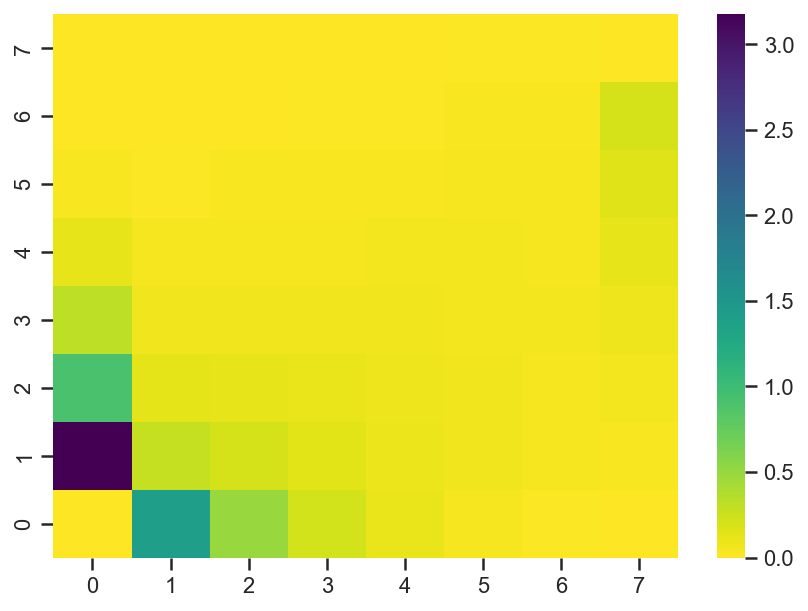

In [65]:
plt.subplots(1, 1, figsize=(7, 5))
ax = sns.heatmap(pd.DataFrame(im_expectation), cmap="viridis_r", 
#                annot=True
                )
ax.invert_yaxis()
plt.savefig('im_stage.pdf')

Expectation for panmictic ancestral population:

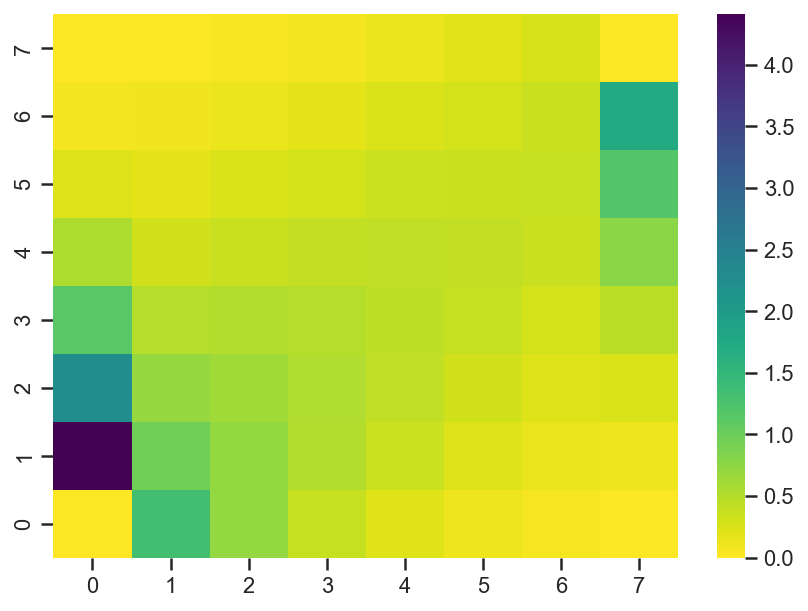

In [66]:
plt.subplots(1, 1, figsize=(7, 5))
ax = sns.heatmap(a_expectation, cmap="viridis_r", 
#                annot=True
                 
                )
ax.invert_yaxis()
plt.savefig('a_stage.pdf')

Expectation for combined IM model with split time:

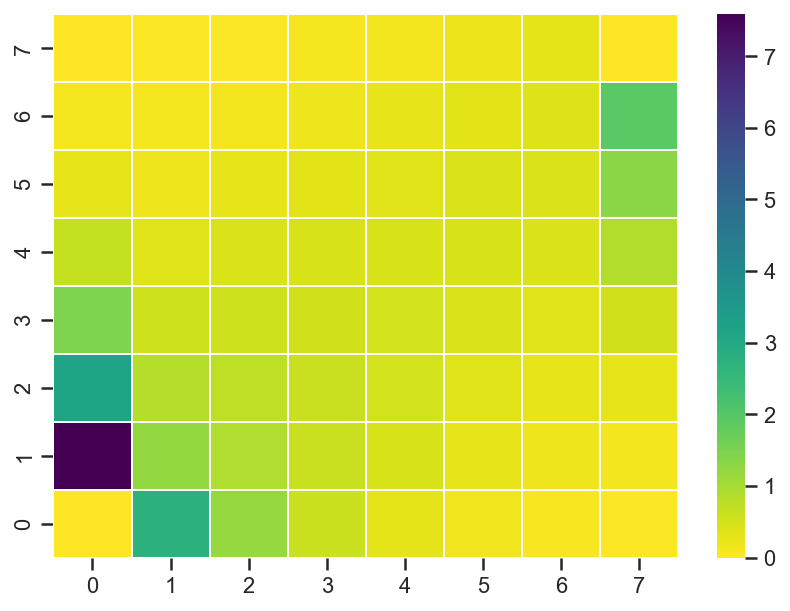

In [67]:
plt.subplots(1, 1, figsize=(7, 5))
ax = sns.heatmap(im_expectation + a_expectation, cmap="viridis_r", 
                # annot=True,
                 linewidths=1,
                 linecolor='white'
                )
ax.invert_yaxis()
#plt.savefig(f"figures/im_{n1}_{n1}_{m1}_{m2}_{split_t}.pdf")

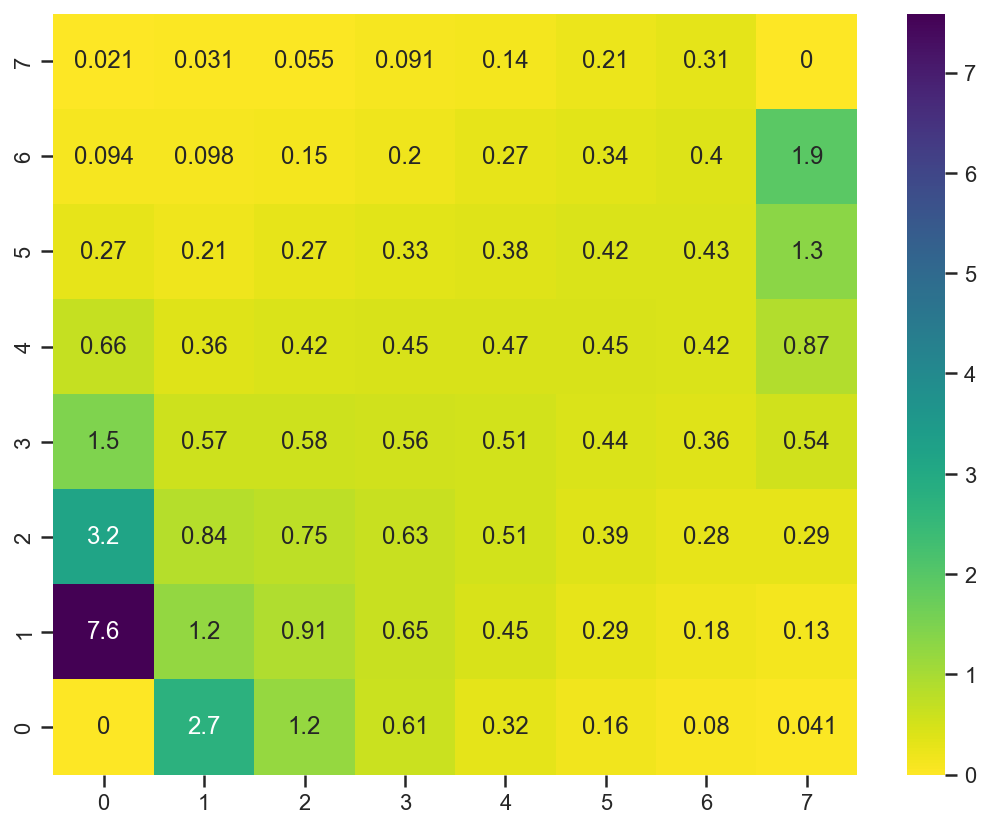

In [68]:
plt.subplots(1, 1, figsize=(9, 7))
ax = sns.heatmap(im_expectation + a_expectation, cmap="viridis_r", 
                annot=True
                )
ax.invert_yaxis()

## Model with two loci, two islands, with samples from one population

Each state has the following three properties:
1. nr decendants at locus 1
2. nr decendants at locus 2
3. what population the lineage is currently in

In [69]:
%%R
Rcpp::sourceCpp("./two_locus_two_island.cpp")

ld: warning: -pie being ignored. It is only used when linking a main executable


In [70]:
# %%R

# setClass("conf", slots=list(locus1="numeric", locus2="numeric", population="numeric"))

# obj <- new("conf", locus1=3, locus2=2, population=1)
# obj@population

# r_index_to_props <- function(s, i) {
#     #' returns the locus1, locus2, population
#     #' conformation of lineages represented by
#     #' state vector index i.
#     stopifnot(i > 0)
#     d <- s + 1 # dim
#     idx <- i - 1
#     p <- idx %/% d**2
#     stopifnot(i <= 2*d**2)
#     a <- (idx - p*d**2) %/% d
#     b <- (idx - p*d**2) %% d
#     return(new("conf", locus1=a, locus2=b, population=p+1))
# }
# r_props_to_index <- function(s, a, b, p) {
#     #' returns the state vector index representing
#     #' the locus1, locus2, population conformation.
#     d <- s + 1
#     i = (p-1)*d**2 + a*d + b + 1
#     return(i)
# }

In [71]:
# %%R
# n <- 2
# for (p in 1:2) {
#     for (i in 0:n) {
#         for (j in 0:n) {
#             print(props_to_index(n, i, j, p))
#             print(r_props_to_index(n, i, j, p))
#         }
#     }
# }

In [72]:
%%time
%%R -o s
s <- 6
N <- 1
M <- 0
R <- 1
tli_graph <- construct_twolocus_island_graph(s, N, M, R)
print(vertices_length(tli_graph))

[1] 1044
CPU times: user 89.9 ms, sys: 5.22 ms, total: 95.2 ms
Wall time: 93.1 ms


In [73]:
%%R -o outgoing_edge_counts
si <- sign(graph_as_matrix(tli_graph)$SIM)
diag(si) <- 0
outgoing_edge_counts <- rowSums(si)
print(mean(outgoing_edge_counts))
# qplot(outgoing_edge_counts, bins=100, asp=1)

[1] 7.74856


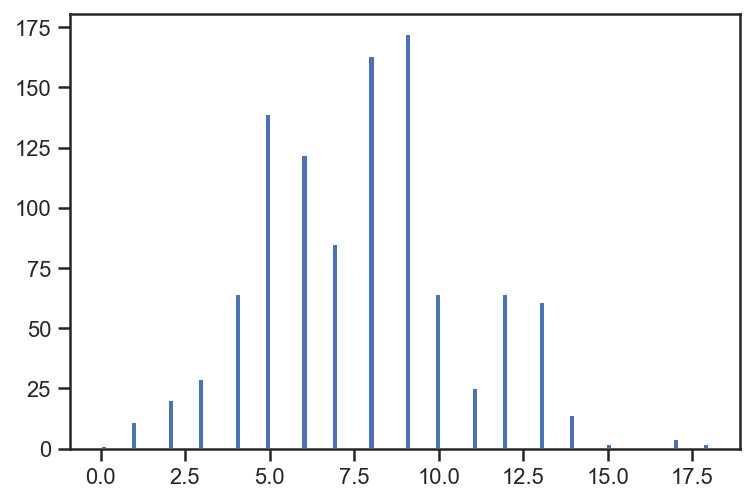

In [74]:
plt.hist(outgoing_edge_counts, bins=100) ;

In [75]:
%%time
%%R
expectation(tli_graph)

[1] 2.220418
CPU times: user 21.1 ms, sys: 6.65 ms, total: 27.8 ms
Wall time: 24 ms


INFO: building reward compute graph...


In [76]:
# %%time
# %%R
# graph_update_weights_parameterized(tli_graph, c(1, 1, 1))
# expectation(tli_graph)

In [77]:
# %%R -o graph -o states -o ipv -o sim

# ###########################
# # sample size
# s <- 2
# ###########################

# # number of populations
# p <- 2 # needs to be 2
# # state vector length
# n <- p*(s+1)**2

# graph <- create_graph(n)
# index <- 1
# # first_vertex <- create_vertex(graph, c(rep(0, s+2), s, rep(0, n-s-3))) # assumes that p=2
# state <- rep(0, n)
# state[conf_to_index(s, 1, 1, 1)] <- s
# first_vertex <- create_vertex(graph, state) # assumes that p=2
# add_edge(starting_vertex(graph), first_vertex, 1)

# index <- 2
# while (index <= vertices_length(graph)) {
    
#   vertex <- vertex_at(graph, index)
#   state <- vertex$state
  
#   count <- 0
#   for (i in 1:n) {
#       count <- count + state[i]
#   }
#   if (count <= 1) {
#       # Only one lineage, stop
#       index <- index + 1
#       next
#   }    
    
#   for (i in 1:n) {
#     conf_i <- index_to_conf(s, i)
    
#     # coalescence #########################
#     for (j in i:n) {
#       conf_j <- index_to_conf(s, j)
      
#       if (conf_i@population != conf_j@population) {
#         # different populations
#         next
#       }
#       if (i == j) {
#         if (state[i] < 2) {
#           next;
#         }
#         rate <- state[i] * (state[i] - 1) / 2
#       } else {
#         if (state[i] < 1 || state[j] < 1) {
#           next;
#         }
#         rate <- state[i] * state[j]
#       }
      
#       child_state <- state
        
#       # lineages with index i and j coalesce:  
#       child_state[i] <- child_state[i] - 1
#       child_state[j] <- child_state[j] - 1
#       stopifnot(conf_i@locus1+conf_j@locus1 <= s)
#       stopifnot(conf_i@locus2+conf_j@locus2 <= s)

#       # coalescene into lineage with index k
#       k = conf_to_index(s, conf_i@locus1+conf_j@locus1, conf_i@locus2+conf_j@locus2, conf_i@population)
#       child_state[k] <- child_state[k] + 1
      
#       child_vertex <- find_or_create_vertex(graph, child_state)
#       add_edge(vertex, child_vertex, rate)
#     }
    
#     # recombination #######################
#     if (state[i] > 0 && conf_i@locus1 > 0 && conf_i@locus2 > 0) {
      
#       rate <- 3
#       child_state <- state
        
#       # a lineage with index i recombines to produce lineages with index k and l
#       k = conf_to_index(s, conf_i@locus1, 0, conf_i@population)
#       l = conf_to_index(s, 0, conf_i@locus2, conf_i@population)
#       child_state[i] <- child_state[i] - 1
#       child_state[k] <- child_state[k] + 1
#       child_state[l] <- child_state[l] + 1
      
#       child_vertex <- find_or_create_vertex(graph, child_state)
#       add_edge(vertex, child_vertex, rate)
#     }
    
#     # migration ###########################
#     if (state[i] > 0) {
      
#       rate <- 0.001
#       child_state <- state
        
#       if (conf_i@population == 1) {
#         m = 2
#       } else {
#         m = 1
#       }
#       # 
#       k = conf_to_index(s, conf_i@locus1, conf_i@locus2, m)
#       child_state[i] <- child_state[i] - 1
#       child_state[k] <- child_state[k] + 1
      
#       child_vertex <- find_or_create_vertex(graph, child_state)
#       add_edge(vertex, child_vertex, rate)
#     }
#   }
  
#   index <- index + 1
    
#   if ((index %% 50) == 0) {
#     cat(index, vertices_length(graph), "\n")
#   }
    
# }

# states <- t(sapply(1:vertices_length(graph), function(index) vertex_at(graph, index)$state, simplify = FALSE))
# ipv <- graph_as_matrix(graph)$IPV
# sim <- graph_as_matrix(graph)$SIM

# graph_as_matrix(graph)

In [78]:
%%R
rewards <- sapply(1:vertices_length(tli_graph), function(index) vertex_at(tli_graph, index)$state )

### Varying population size in epoques

In [79]:
# %%time
# %%R -o n1 -o n2 -o m1 -o m2 -o split_t -o im_expectation -o a_expectation

# # parameters
# n <- 10

# # graphs with paramerized N
# g <- kingman(n)


# expectation <- matrix(nrow=n1+1,ncol=n2+1)
# prev_t <- 0
# epoque_start_prob <- c(1,0,0,0...)

# for (t in 1:5) {

#     rescale_...
#     epoque_expected_visits <- accumulated_visiting_time(g, t-prev_t)
#     for (i in 0:n1) {
#       for (j in 0:n2) {
#         expectation[i+1,j+1] <- expectation[i+1,j+1] + sum(epoque_start_prob * epoque_expected_visits * rewards_at(im_g, i,j,n1,n2))
#       }
#     }
#     epoque_start_prob <- epoque_expected_visits
#     prev_t <- 1
# }




### Two-locus SFS for a two-island model

Expected ARG branches with i and j tons from each locus

In [80]:
%%R -o exp_mat
exp_mat <- matrix(nrow=s-1,ncol=s-1)
for (i in 1:s-1) {
  for (j in 1:s-1) {
    exp_mat[i,j] <- expectation(tli_graph, rewards[props_to_index(s, i, j, 1),] + rewards[props_to_index(s, i, j, 2),])
  }
}

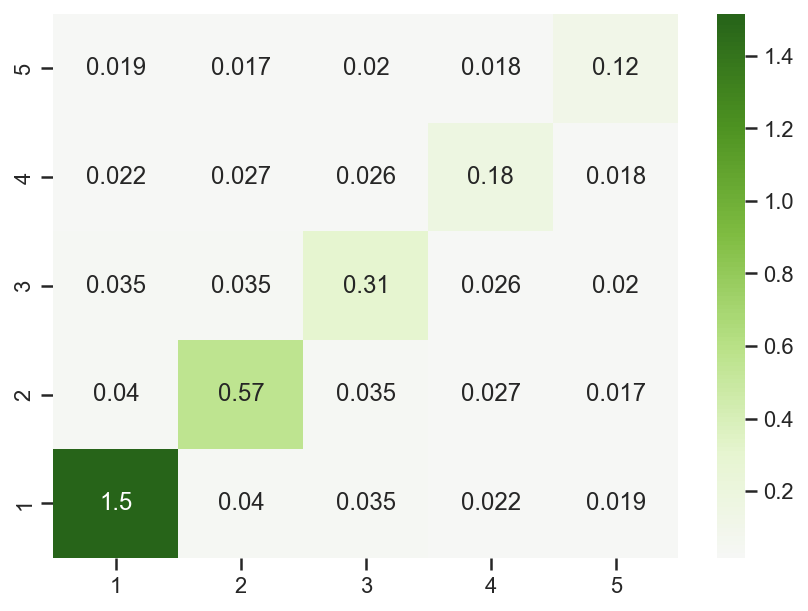

In [81]:
# plt.subplots(1, 1, figsize=(7, 5))
# ax = sns.heatmap(exp_mat, cmap="PiYG", 
#                  center=0,
#                 annot=True
#                 )
# ax.invert_yaxis()


plt.subplots(1, 1, figsize=(7, 5))
ticks = list(range(1,int(s)))
ax = sns.heatmap(exp_mat, cmap="PiYG", 
                 center=0,
                yticklabels=ticks,
                xticklabels=ticks,
                annot=True
                )
ax.invert_yaxis()

### Marginal SFSs for each locus

In [82]:
%%R -o sfs_locus1 -o sfs_locus2

sfs_locus1 <- colSums(exp_mat)
sfs_locus2 <- rowSums(exp_mat)

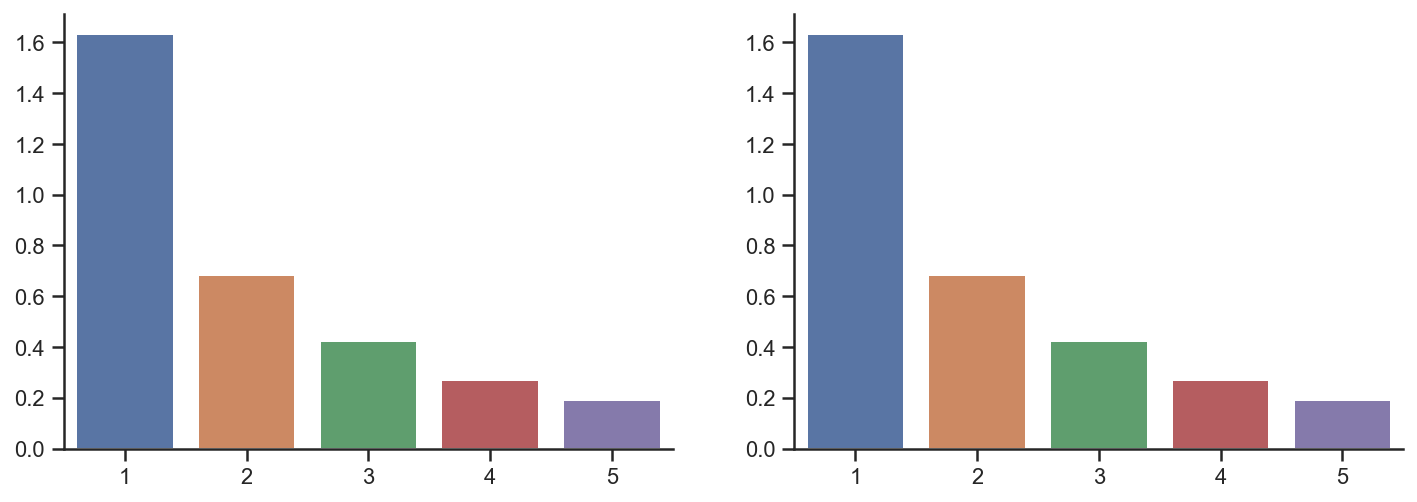

In [83]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.barplot(x=list(range(1, len(sfs_locus1)+1)), y=sfs_locus1, ax=axes[0]).set_title("")
sns.barplot(x=list(range(1, len(sfs_locus2)+1)), y=sfs_locus2, ax=axes[1]).set_title("")
sns.despine()

### Covariance of ARG branches in the two populations

Covariance of two-locus "ton" branch length (e.g. singletons at locus 1 and doubletons at locus 2) spent in each population.

In [84]:
%%R -o cov_mat
fun <- function(a, b) mapply(function(i, j) covariance(tli_graph, rewards[props_to_index(s, i, j, 1),], rewards[props_to_index(s, i, j, 2),]), a, b)
cov_mat <- outer(1:(s-1), 1:(s-1), fun)

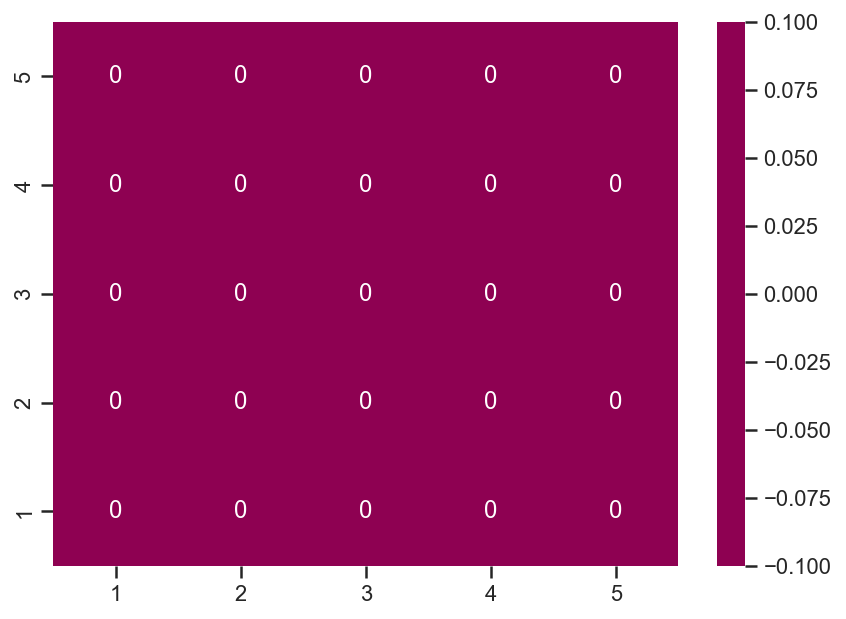

In [85]:
plt.subplots(1, 1, figsize=(7, 5))
ticks = list(range(1,int(s)))
ax = sns.heatmap(cov_mat, cmap="PiYG", 
                 center=0,
                yticklabels=ticks,
                xticklabels=ticks,
                annot=True
                )
ax.invert_yaxis()

Shows that when there are hte same number of decendants at each locus (mostly becuase of no recombination) then the covariance is highest. Mostly for small tons where there are many lineages to back and forth between popoulations.

### Covriance between tons at each locus

In [86]:
%%R -o cov_mat
r_props_to_index <- function(s, a, b, p) {
    return((p-1)*(s + 1)**2 + a*(s + 1) + b + 1)
}

locus1_rewards <- function(i) {
    colSums(rewards[r_props_to_index(s, i, 1:s, 1),]) + colSums(rewards[r_props_to_index(s, i, 1:s, 2),])
}
locus2_rewards <- function(j) {
    colSums(rewards[r_props_to_index(s, 1:s, j, 1),]) + colSums(rewards[r_props_to_index(s, 1:s, j, 2),])
}
fun <- function(a, b) mapply(function(i, j) covariance(tli_graph, locus1_rewards(i), locus2_rewards(j)), a, b)
cov_mat <- outer(1:(s-1), 1:(s-1), fun)

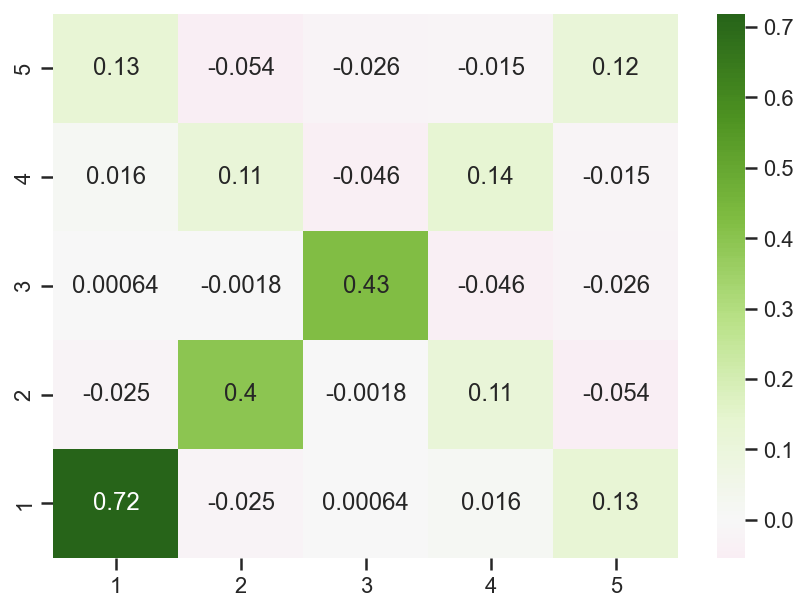

In [87]:
plt.subplots(1, 1, figsize=(7, 5))
ticks = list(range(1,int(s)))
ax = sns.heatmap(cov_mat, cmap="PiYG", 
                annot=True,
                center=0,
                yticklabels=ticks,
                xticklabels=ticks
                )
ax.invert_yaxis()

In [88]:
%%R
tli_graph <- construct_twolocus_island_graph(s, 1, 1, 1)
rewards <- sapply(1:vertices_length(tli_graph), function(index) vertex_at(tli_graph, index)$state )

In [89]:
%%R -o cov_mat
r_props_to_index <- function(s, a, b, p) {
    return((p-1)*(s + 1)**2 + a*(s + 1) + b + 1)
}

locus1_rewards <- function(i) {
    colSums(rewards[r_props_to_index(s, i, 1:s, 1),]) + colSums(rewards[r_props_to_index(s, i, 1:s, 2),])
}
locus2_rewards <- function(j) {
    colSums(rewards[r_props_to_index(s, 1:s, j, 1),]) + colSums(rewards[r_props_to_index(s, 1:s, j, 2),])
}
fun <- function(a, b) mapply(function(i, j) covariance(tli_graph, locus1_rewards(i), locus2_rewards(j)), a, b)
cov_mat <- outer(1:(s-1), 1:(s-1), fun)

INFO: building reward compute graph...


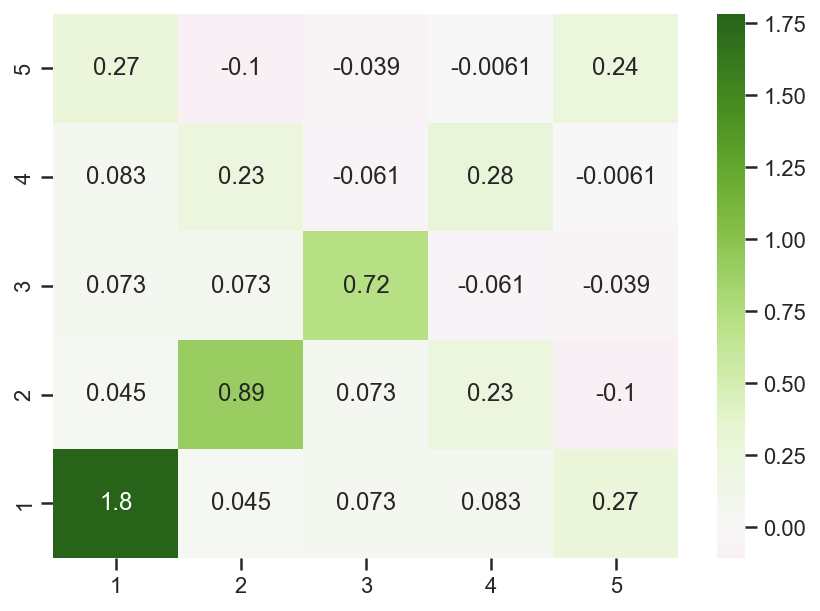

In [90]:
plt.subplots(1, 1, figsize=(7, 5))
ticks = list(range(1,int(s)))
ax = sns.heatmap(cov_mat, cmap="PiYG", 
                annot=True,
                center=0,
                yticklabels=ticks,
                xticklabels=ticks
                )
ax.invert_yaxis()

## Rabbit model

In [91]:
#Image("../images/rabbitislands.png", width=600)

In [92]:
%%R
Rcpp::sourceCpp("./rabbit_construction.cpp")

ld: warning: -pie being ignored. It is only used when linking a main executable


In [93]:
%%time
%%R
graph <- construct_rabbit_graph(1000, 4, 2)
print(vertices_length(graph))
expectation(graph)

[1] 501502


INFO: building reward compute graph...


[1] 0.3056984
CPU times: user 52.3 s, sys: 49.9 s, total: 1min 42s
Wall time: 2min 22s


In [94]:
%%R -o states -o ipv -o sim
L <- 2
  
tim <- proc.time()
state_vector_length <- 2
graph <- create_graph(state_vector_length)
starting_vertex <- vertex_at(graph, 1)
initial_state <- c(L, 0)

add_edge(
  starting_vertex,
  create_vertex(graph, initial_state),
  1
)
index <- 2

while (index <= vertices_length(graph)) {
  vertex <- vertex_at(graph, index)
  state <- vertex$state
  
  if (state[1] > 0) {
    # Rabbit jump left to right
    child_state <- c(state[1] - 1, state[2] + 1)
    add_edge(
      vertex,
      find_or_create_vertex(graph, child_state),
      1
      # 0, c(1, 0)
    )
    
    # Island flooding
    child_state <- c(0, state[2])
    add_edge(
      vertex,
      find_or_create_vertex(graph, child_state),
      2
      # 0, c(0, 1)

    )
  }
  
  if (state[2] > 0) {
    # Rabbit jump right to left
    child_state <- c(state[1] + 1, state[2] - 1)
    add_edge(
      vertex,
      find_or_create_vertex(graph, child_state),
      1
      # 0, c(1, 0)
    )
    
    # Island flooding
    child_state <- c(state[1], 0)
    add_edge(
      vertex,
      find_or_create_vertex(graph, child_state),
      4
      # 0, c(0, 2)
    )
  }
  
  index <- index + 1
}

states <- t(sapply(1:vertices_length(graph), function(index) vertex_at(graph, index)$state ))
ipv <- graph_as_matrix(graph)$IPV
sim <- graph_as_matrix(graph)$SIM

vertices_length(graph)

[1] 8


In [95]:
%%R
graph_update_weights_parameterized(graph, c(1, 2))

In [96]:
%%R
states <- t(sapply(1:vertices_length(graph), function(index) vertex_at(graph, index)$state ))
ipv <- graph_as_matrix(graph)$IPV
sim <- graph_as_matrix(graph)$SIM
states

     [,1] [,2]
[1,]    0    0
[2,]    2    0
[3,]    1    1
[4,]    0    0
[5,]    0    2
[6,]    0    1
[7,]    2    0
[8,]    1    0


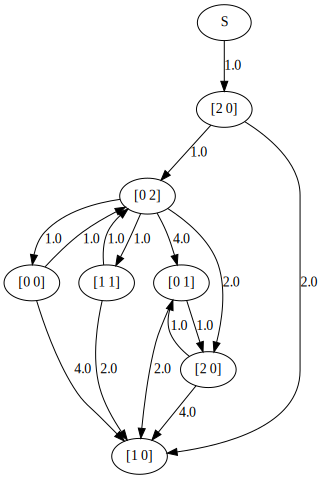

In [97]:
plot_graph(states, ipv, sim)

In [98]:
%%R
expectation(graph)

[1] 0.5038265


INFO: building reward compute graph...


## Running time experiments

In [ ]:
%%R

cat("rabbits,vertices,time_to_construct,time_build_moment_graph,time_compute_expectation,time_compute_first_10_moments\n")
flush.console()
for (L in c(10, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500)) {
  
  tim <- proc.time()
  state_vector_length <- 2
  graph <- create_graph(state_vector_length)
  starting_vertex <- vertex_at(graph, 1)
  initial_state <- c(L, 0)
  cat(L)
  cat(",")
  flush.console()
  add_edge(
    starting_vertex,
    create_vertex(graph, initial_state),
    1
  )
  index <- 2
  
  while (index <= vertices_length(graph)) {
    vertex <- vertex_at(graph, index)
    state <- vertex$state
    
    if (state[1] > 0) {
      # Rabbit jump left to right
      child_state <- c(state[1] - 1, state[2] + 1)
      add_edge(
        vertex,
        find_or_create_vertex(graph, child_state),
        1
      )
      
      # Island flooding
      child_state <- c(0, state[2])
      add_edge(
        vertex,
        find_or_create_vertex(graph, child_state),
        1
      )
    }
    
    if (state[2] > 0) {
      # Rabbit jump right to left
      child_state <- c(state[1] + 1, state[2] - 1)
      add_edge(
        vertex,
        find_or_create_vertex(graph, child_state),
        1
      )
      
      # Island flooding
      child_state <- c(state[1], 0)
      add_edge(
        vertex,
        find_or_create_vertex(graph, child_state),
        1
      )
    }
    
    index <- index + 1
  }
  
  cat(vertices_length(graph))
  cat(",")
  now <- proc.time()
  cat((now - tim)[3])
  cat(",")
  flush.console()
  tim <- proc.time()
  expected_waiting_time(graph)
  now <- proc.time()
  cat((now - tim)[3])
  cat(",")
  flush.console()
  
  
  tim <- proc.time()
  expected_waiting_time(graph)
  now <- proc.time()
  cat((now - tim)[3])
  cat(",")
  flush.console()
  
  tim <- proc.time()
  
  rw <-  rep(1, vertices_length(graph))
  
  for (i in 1:10) {
    rw <- expected_waiting_time(graph, rw)
  }
  now <- proc.time()
  cat((now - tim)[3])
  cat("\n")
  flush.console()
}



cat("rabbits,vertices,time_convert_matrix,time_inverse_matrix\n")
flush.console()
for (L in c(10, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500)) {
  
  tim <- proc.time()
  state_vector_length <- 2
  graph <- create_graph(state_vector_length)
  starting_vertex <- vertex_at(graph, 1)
  initial_state <- c(L, 0)
  cat(L)
  cat(",")
  flush.console()
  add_edge(
    starting_vertex,
    create_vertex(graph, initial_state),
    1
  )
  index <- 2
  
  while (index <= vertices_length(graph)) {
    vertex <- vertex_at(graph, index)
    state <- vertex$state
    
    if (state[1] > 0) {
      # Rabbit jump left to right
      child_state <- c(state[1] - 1, state[2] + 1)
      add_edge(
        vertex,
        find_or_create_vertex(graph, child_state),
        1
      )
      
      # Island flooding
      child_state <- c(0, state[2])
      add_edge(
        vertex,
        find_or_create_vertex(graph, child_state),
        1
      )
    }
    
    if (state[2] > 0) {
      # Rabbit jump right to left
      child_state <- c(state[1] + 1, state[2] - 1)
      add_edge(
        vertex,
        find_or_create_vertex(graph, child_state),
        1
      )
      
      # Island flooding
      child_state <- c(state[1], 0)
      add_edge(
        vertex,
        find_or_create_vertex(graph, child_state),
        1
      )
    }
    
    index <- index + 1
  }
  
  cat(vertices_length(graph))
  cat(",")
  flush.console()
  tim <- proc.time()
  M <- graph_as_matrix(graph)
  now <- proc.time()
  cat((now - tim)[3])
  cat(",")
  flush.console()
  
  
  tim <- proc.time()
  solve(M$SIM)
  now <- proc.time()
  cat((now - tim)[3])
  cat("\n")
  flush.console()
}

rabbits,vertices,time_to_construct,time_build_moment_graph,time_compute_expectation,time_compute_first_10_moments
10,68,0.022,0.002,0,0.001
50,1328,0.114,0.015,0,0.002
100,

INFO: building reward compute graph...
INFO: building reward compute graph...


5153,1.567,0.043,0.001,0.014
150,

INFO: building reward compute graph...


11478,0.626,0.11,0.004,0.046
200,

INFO: building reward compute graph...


20303,1.129,

INFO: building reward compute graph...


0.281,0.01,0.096
250,31628,2.184,

INFO: building reward compute graph...


0.532,0.022,0.197
300,45453,3.139,

INFO: building reward compute graph...


0.869,0.035,0.314
350,61778,4.381,

INFO: building reward compute graph...


1.714,0.058,0.656
400,80603,7.666,

INFO: building reward compute graph...


3.927,0.148,1.349
450,101928,11.044,

INFO: building reward compute graph...


5.916,0.199,1.846
500,125753,14.196,

INFO: building reward compute graph...


8.116,0.251,2.542
rabbits,vertices,time_convert_matrix,time_inverse_matrix
10,68,0,0.006
50,1328,0.019,0.159
100,5153,1.073,6.517
150,11478,4.46,58.847
200,20303,19.5,1361.119
250,31628,51.197,978.453
300,45453,110.844,